In [1]:
import qsharp
from numpy import arccos,radians,degrees,pi,round_
from qiskit.visualization import plot_bloch_vector

Preparing Q# environment...


In [2]:
%%qsharp

open Microsoft.Quantum.Intrinsic;
open Microsoft.Quantum.Diagnostics;
open Microsoft.Quantum.Convert;

operation SetQubitState (required_state : Result, current_qubit : Qubit) : Unit {
    if required_state != M(current_qubit){
        X(current_qubit);
    }
}

operation Interference() : Unit {
    
    use q1 = Qubit();
    
    SetQubitState(Zero, q1);
    DumpMachine();
    
    H(q1);
    
    DumpMachine();
    
    H(q1);
    
    DumpMachine();

}

In [3]:
Interference.simulate()
with qsharp.capture_diagnostics() as diagnostics:
    Interference.simulate()

value1 = diagnostics[0]['amplitudes']['0']['Real']

value2 = diagnostics[1]['amplitudes']['0']['Real']

temp3 = diagnostics[2]['amplitudes']['0']['Real']

value3 = round_(temp3)

print(value1)
print(value2)
print(value3)

|0⟩	1 + 0𝑖
|1⟩	0 + 0𝑖

|0⟩	0.7071067811865476 + 0𝑖
|1⟩	0.7071067811865476 + 0𝑖

|0⟩	1.0000000000000002 + 0𝑖
|1⟩	4.266421588589642E-17 + 0𝑖

1.0
0.7071067811865476
1.0


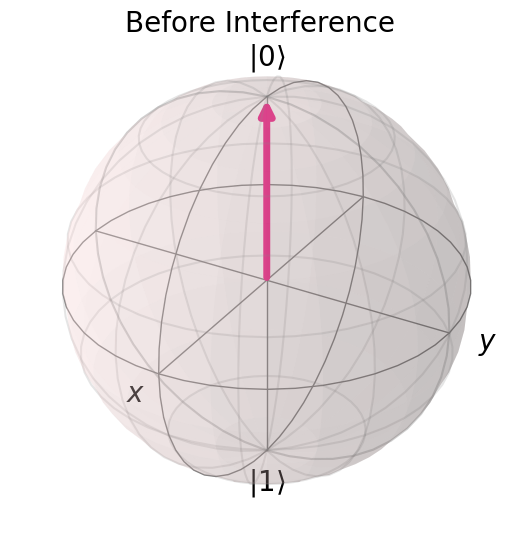

In [4]:
theta_Before = radians(degrees(2 * arccos(value1)))
radius = 1
phi_Before = 0

plot_bloch_vector([radius,theta_Before,phi_Before], coord_type = "spherical", title = "Before Interference")

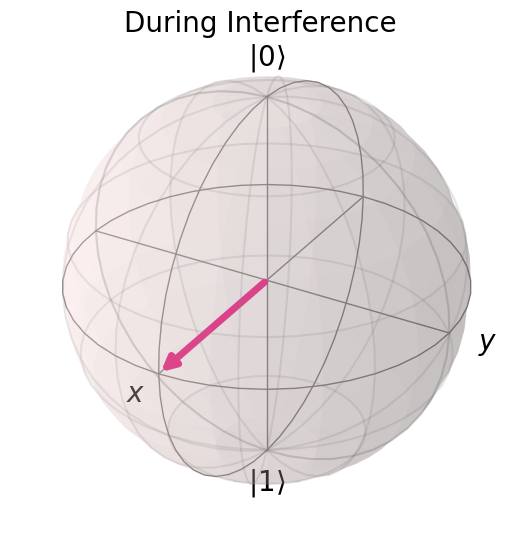

In [5]:
theta_While = radians(degrees(2 * arccos(value2)))
radius = 1
phi_While = 0

plot_bloch_vector([radius,theta_While,phi_While], coord_type = "spherical", title = "During Interference")

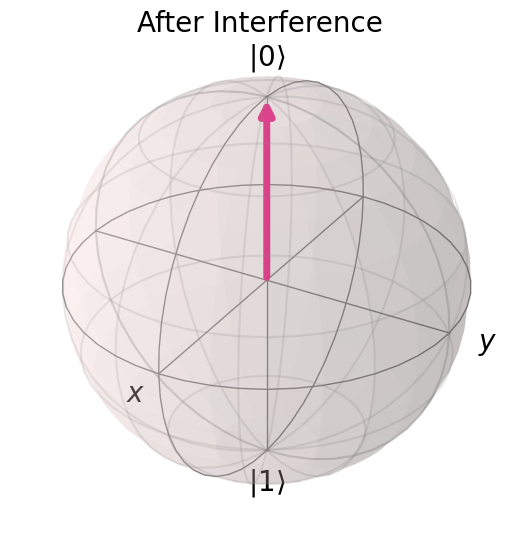

In [6]:
theta_After = radians(degrees(2 * arccos(value3)))
radius = 1
phi_After = 0

plot_bloch_vector([radius,theta_After,phi_After], coord_type = "spherical", title = "After Interference")